In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os

## Read Data

In [5]:
def read_sensor_data(file_prefix, num_sensors=15):
    sensor_dataframes = []
    for i in range(1, num_sensors + 1):
        filename = f'data/{file_prefix}{i:02d}.csv'
        sensor_df = pd.read_csv(filename)
        sensor_dataframes.append(sensor_df)
    return sensor_dataframes

sensor_dataframes = read_sensor_data('Indoor')

## Clean Data

In [27]:
def clean_sensor_dataframes(sensor_dataframes):
    numeric_columns = ['PM 1.0', 'PM 2.5', 'PM 4.0', 'PM 10',
                       'NC 0.5', 'NC 1.0', 'NC 2.5', 'NC 10',
                       'CO2', 'Barometric Pressure', 'VOC tVOC measurement',
                       'VOC Ethanol', 'Temperature', 'Relative Humidity']
    cleaned_dataframes = []
    for sensor_df in sensor_dataframes:
        # remove header
        sensor_df = sensor_df.iloc[1:]
        # Sort by 'Timestamp'
        sensor_df = sensor_df.sort_values(by=['Timestamp']).reset_index()
        # Change 'Timestamp' to date format
        sensor_df['Timestamp'] = pd.to_datetime(sensor_df['Timestamp'])
        # Convert specified columns to numeric
        sensor_df[numeric_columns] = sensor_df[numeric_columns].apply(pd.to_numeric, errors='coerce')
        # Append the cleaned DataFrame to the list
        cleaned_dataframes.append(sensor_df)
    return cleaned_dataframes
cleaned_sensor_dataframes = clean_sensor_dataframes(sensor_dataframes)

## Plot PM

### PM2.5 of all sensors

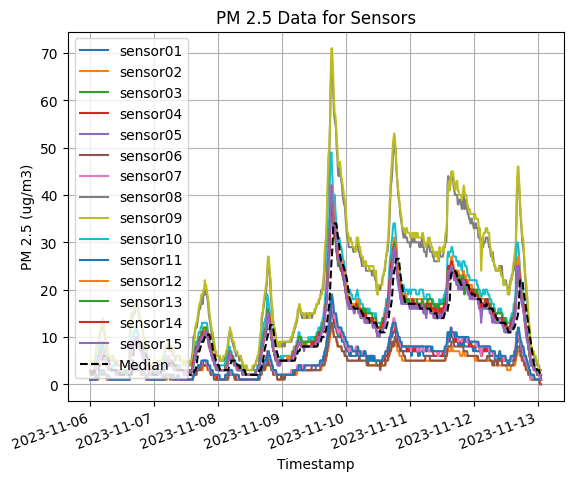

In [37]:
sensor_names = ['sensor01', 'sensor02', 'sensor03', 'sensor04', 'sensor05', 
                'sensor06', 'sensor07', 'sensor08', 'sensor09', 'sensor10',
                'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15']
window_size = 10  
# Calculate the rolling median
rolling_median_pm= pd.concat([sensor_df['PM 2.5'].rolling(window=window_size, min_periods=1).median() for sensor_df in cleaned_sensor_dataframes], axis=1)
for sensor_df, sensor_name in zip(cleaned_sensor_dataframes, sensor_names):
    plt.plot(sensor_df['Timestamp'], sensor_df['PM 2.5'], label=sensor_name)
plt.plot(cleaned_sensor_dataframes[4]['Timestamp'], rolling_median_pm.median(axis=1), color='black', linestyle='dashed', label='Median')
plt.xlabel('Timestamp')
plt.ylabel('PM 2.5 (ug/m3)')
plt.title('PM 2.5 Data for Sensors')
plt.legend()
plt.xticks(rotation=20, ha='right')
plt.grid(True)
plt.show()

## Harmonization

ValueError: operands could not be broadcast together with shapes (676,) (675,) 

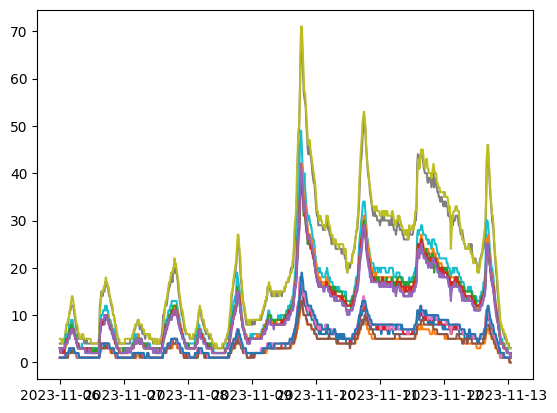

## Plot CO2

### All sensors

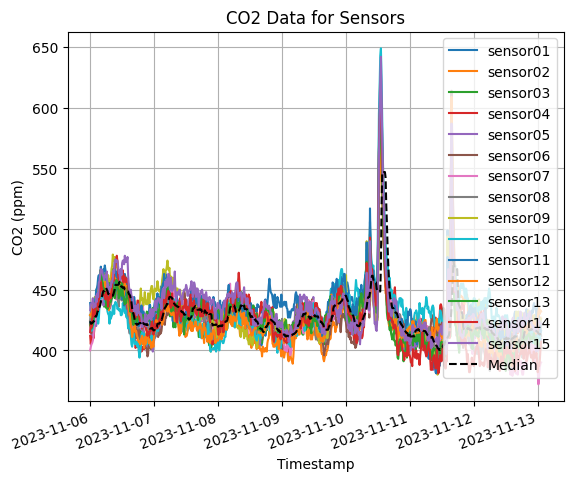

In [48]:
# Calculate the rolling median 
rolling_median_co2 = pd.concat([sensor_df['CO2'].rolling(window=window_size, min_periods=1).median() for sensor_df in cleaned_sensor_dataframes], axis=1)
for sensor_df, sensor_name in zip(cleaned_sensor_dataframes, sensor_names):
    plt.plot(sensor_df['Timestamp'], sensor_df['CO2'], label=sensor_name)
# Plotting median line
plt.plot(cleaned_sensor_dataframes[4]['Timestamp'], rolling_median_co2.median(axis=1), color='black', linestyle='dashed', label='Median')
plt.xlabel('Timestamp')
plt.ylabel('CO2 (ppm)')
plt.title('CO2 Data for Sensors')
plt.legend()
plt.xticks(rotation=20, ha='right')
plt.grid(True)
plt.show()

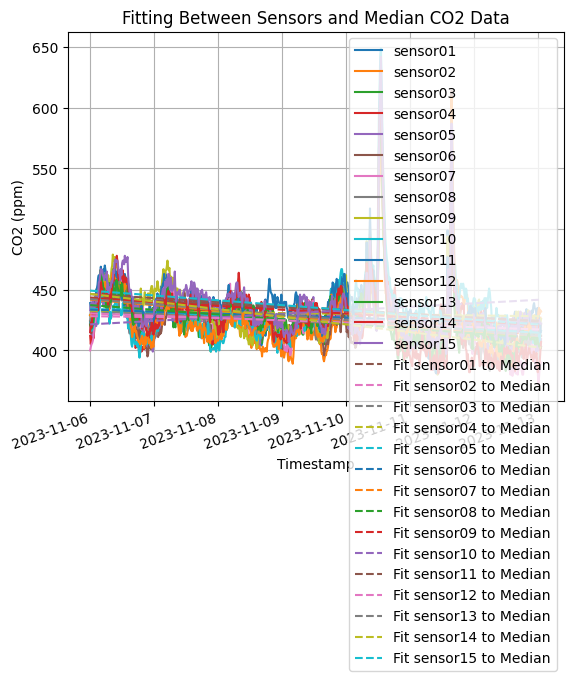

In [54]:
import numpy as np
from scipy.optimize import curve_fit
# Function to fit each sensor's data to the linear function
def fit_sensor_to_median(x, y):
    def linear_function(x, m, b):
        return m * x + b

    params, _ = curve_fit(linear_function, x, y, p0=[1, 0])
    return linear_function(x, *params)

# Plotting the data for each sensor
for sensor_df, sensor_name in zip(cleaned_sensor_dataframes, sensor_names):
    plt.plot(sensor_df['Timestamp'], sensor_df['CO2'], label=sensor_name)

# Fitting and plotting the function between each sensor and the median
for sensor_df, sensor_name in zip(cleaned_sensor_dataframes, sensor_names):
    x = np.arange(len(sensor_df['CO2']))
    y_sensor = sensor_df['CO2'].values
    y_median = rolling_median_co2.median(axis=1).values
    fitted_data = fit_sensor_to_median(x, y_sensor)
    plt.plot(sensor_df['Timestamp'], fitted_data, label=f'Fit {sensor_name} to Median', linestyle='dashed')

plt.xlabel('Timestamp')
plt.ylabel('CO2 (ppm)')
plt.title('Fitting Between Sensors and Median CO2 Data')
plt.legend()
plt.xticks(rotation=20, ha='right')
plt.grid(True)
plt.show()


## Plot Barometric Pressure

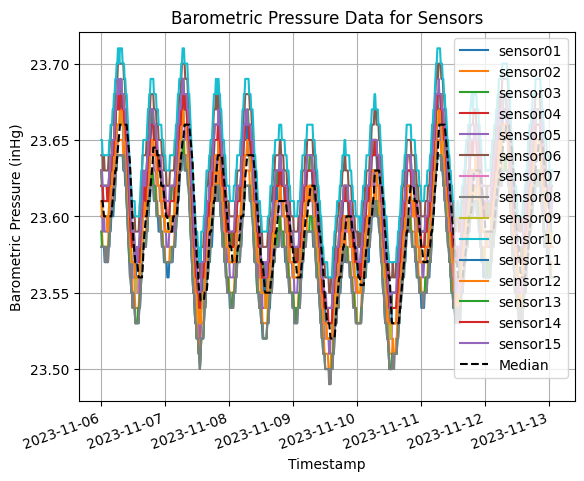

In [38]:
# Calculate the rolling median
rolling_median_BP = pd.concat([sensor_df['Barometric Pressure'].rolling(window=window_size, min_periods=1).median() for sensor_df in cleaned_sensor_dataframes], axis=1)
for sensor_df, sensor_name in zip(cleaned_sensor_dataframes, sensor_names):
    plt.plot(sensor_df['Timestamp'], sensor_df['Barometric Pressure'], label=sensor_name)
plt.plot(cleaned_sensor_dataframes[4]['Timestamp'], rolling_median_BP.median(axis=1), color='black', linestyle='dashed', label='Median')
plt.xlabel('Timestamp')
plt.ylabel('Barometric Pressure (inHg)')
plt.title('Barometric Pressure Data for Sensors')
plt.legend()
plt.xticks(rotation=20, ha='right')
plt.grid(True)
plt.show()

## Plot VOC

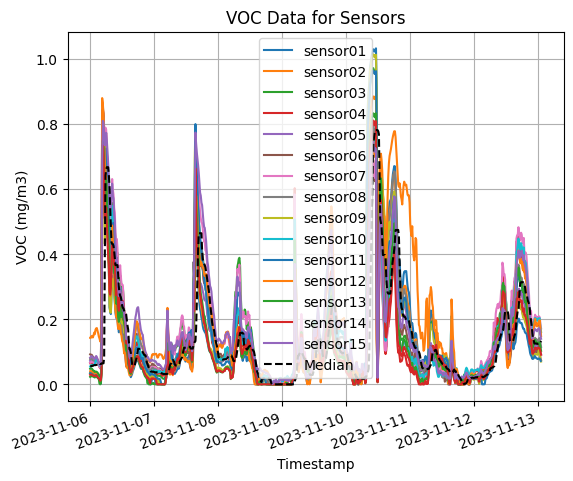

In [39]:
rolling_median_VOC = pd.concat([sensor_df['VOC tVOC measurement'].rolling(window=window_size, min_periods=1).median() for sensor_df in cleaned_sensor_dataframes], axis=1)
for sensor_df, sensor_name in zip(cleaned_sensor_dataframes, sensor_names):
    plt.plot(sensor_df['Timestamp'], sensor_df['VOC tVOC measurement'], label=sensor_name)
plt.plot(cleaned_sensor_dataframes[4]['Timestamp'], rolling_median_VOC.median(axis=1), color='black', linestyle='dashed', label='Median')
plt.xlabel('Timestamp')
plt.ylabel('VOC (mg/m3)')
plt.title('VOC Data for Sensors')
plt.legend()
plt.xticks(rotation=20, ha='right')
plt.grid(True)
plt.show()

## Plot Humidity

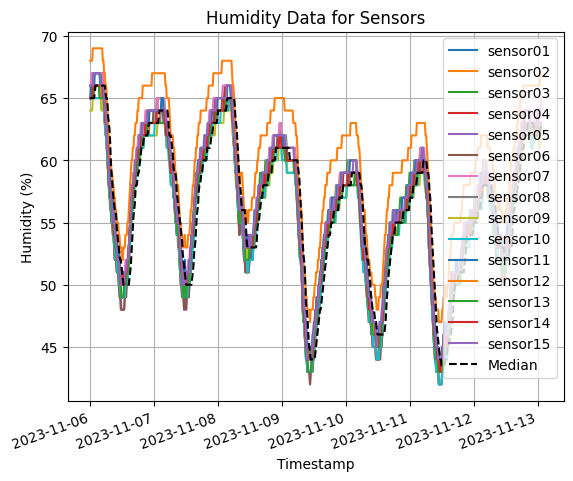

In [40]:
rolling_median_humid = pd.concat([sensor_df['Relative Humidity'].rolling(window=window_size, min_periods=1).median() for sensor_df in cleaned_sensor_dataframes], axis=1)
for sensor_df, sensor_name in zip(cleaned_sensor_dataframes, sensor_names):
    plt.plot(sensor_df['Timestamp'], sensor_df['Relative Humidity'], label=sensor_name)
plt.plot(cleaned_sensor_dataframes[4]['Timestamp'], rolling_median_humid.median(axis=1), color='black', linestyle='dashed', label='Median')
plt.xlabel('Timestamp')
plt.ylabel('Humidity (%)')
plt.title('Humidity Data for Sensors')
plt.legend()
plt.xticks(rotation=20, ha='right')
plt.grid(True)
plt.show()

## Plot Temperature

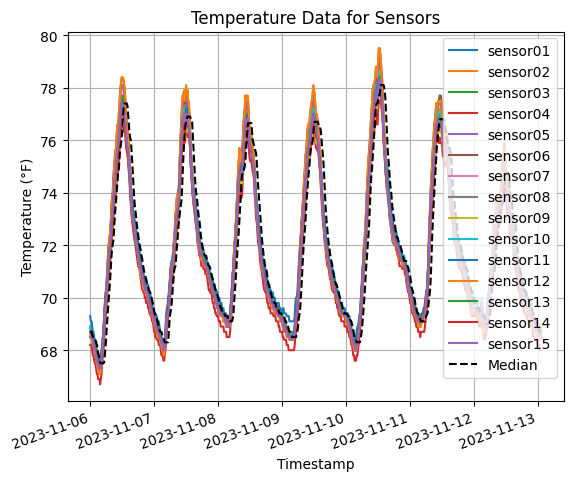

In [41]:
rolling_median_temp = pd.concat([sensor_df['Temperature'].rolling(window=window_size, min_periods=1).median() for sensor_df in cleaned_sensor_dataframes], axis=1)
for sensor_df, sensor_name in zip(cleaned_sensor_dataframes, sensor_names):
    plt.plot(sensor_df['Timestamp'], sensor_df['Temperature'], label=sensor_name)
plt.plot(cleaned_sensor_dataframes[4]['Timestamp'], rolling_median_temp.median(axis=1), color='black', linestyle='dashed', label='Median')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°F)')
plt.title('Temperature Data for Sensors')
plt.legend()
plt.xticks(rotation=20, ha='right')
plt.grid(True)
plt.show()